# Facemask detection using Transfer Learning(Inception V3)

The main purpose of this notebook is improve the accuracy using Transfer Learning. We have did the literature survey 
on various algorithms and found Inception V3 is performing above 99% of accuracy.
Training Validation Metrics of basic CNN
Loss: 0.1204
Accuracy: 0.9641
Time taken: 6 minutes
We wanted to train the lower layers to train the model and achieve the accuracy of about 99%.


Import the packages such as tensorflow,keras

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
from keras.preprocessing import image
import numpy as np

In [3]:
##sudo pip install tensorflow

In [3]:
base_dir = '.'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'test')


Import the inception model

In [5]:
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [6]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

In [7]:
for layer in pre_trained_model.layers:
  layer.trainable = False

Callback to stop the training once desired accuracy is reached

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

Build the Network layers with Inception V3

In [11]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

#model.compile(optimizer = RMSprop(learning_rate=0.0001), 
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

Create the training and test data set with lables
EDA
Augument the images with below:
Scale
Rotate
Shear
Zoom
Horizontal flip

In [12]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 16,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 16,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 1318 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


Train the model for 20 epochs

In [13]:
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 20,
            epochs = 20,
            validation_steps = 10,
            verbose = 2,
            callbacks=[callbacks])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/20 - 12s - loss: 7.0700 - acc: 0.8406 - val_loss: 0.1308 - val_acc: 0.9937
Epoch 2/20
20/20 - 8s - loss: 1.1859 - acc: 0.9594 - val_loss: 0.9750 - val_acc: 0.9688
Epoch 3/20
20/20 - 8s - loss: 0.6070 - acc: 0.9710 - val_loss: 0.1674 - val_acc: 0.9937
Epoch 4/20
20/20 - 8s - loss: 1.0050 - acc: 0.9719 - val_loss: 0.6507 - val_acc: 0.9750
Epoch 5/20
20/20 - 8s - loss: 0.6095 - acc: 0.9750 - val_loss: 0.5843 - val_acc: 0.9875
Epoch 6/20
20/20 - 8s - loss: 0.9627 - acc: 0.9563 - val_loss: 0.1364 - val_acc: 0.9875
Epoch 7/20
20/20 - 8s - loss: 1.0274 - acc: 0.9500 - val_loss: 0.2535 - val_acc: 0.9875
Epoch 8/20
20/20 - 8s - loss: 0.5081 - acc: 0.9656 - val_loss: 0.5650 - val_acc: 0.9563
Epoch 9/20
20/20 - 8s - loss: 0.6886 - acc: 0.9581 - val_loss: 0.0758 - val_acc: 0.9937
Epoch 10/20
20/20 - 8s - loss: 0.6016 - acc: 0.9531 - val_loss: 0.0877 - val_acc: 0.9937
Epoch 11/20
20/20 - 8s - loss: 0.4495 - acc: 0.9750 - val_loss: 0.0720 - val_acc: 0.9812
Epoch 12/20
20/20 - 8s - loss

Test the model with prediction for 10 random images with mask

In [18]:
path='./test/with_mask/'
i=0
for x in os.listdir(path):
    if x.endswith(".jpg"):
        # Prints only text file present in My Folder
        img_name=path+x
        print(img_name)
        test_image=image.load_img(img_name, target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=model.predict(test_image)[0][0]
        print("prediction for {} is {}".format(img_name,pred))
        i=i+1
        if i>10:
            break

./test/with_mask/357-with-mask.jpg
prediction for ./test/with_mask/357-with-mask.jpg is 1.0
./test/with_mask/456-with-mask.jpg
prediction for ./test/with_mask/456-with-mask.jpg is 4.587041704318725e-15
./test/with_mask/78-with-mask.jpg
prediction for ./test/with_mask/78-with-mask.jpg is 1.0
./test/with_mask/285-with-mask.jpg
prediction for ./test/with_mask/285-with-mask.jpg is 1.0
./test/with_mask/186-with-mask.jpg
prediction for ./test/with_mask/186-with-mask.jpg is 1.0
./test/with_mask/429-with-mask.jpg
prediction for ./test/with_mask/429-with-mask.jpg is 1.0
./test/with_mask/34-with-mask.jpg
prediction for ./test/with_mask/34-with-mask.jpg is 1.0
./test/with_mask/160-with-mask.jpg
prediction for ./test/with_mask/160-with-mask.jpg is 1.0
./test/with_mask/106-with-mask.jpg
prediction for ./test/with_mask/106-with-mask.jpg is 1.0
./test/with_mask/421-with-mask.jpg
prediction for ./test/with_mask/421-with-mask.jpg is 1.0
./test/with_mask/340-with-mask.jpg
prediction for ./test/with_mask

Test the model with prediction for 10 random images without mask

In [19]:
path='./test/without_mask/'
i=0
for x in os.listdir(path):
    if x.endswith(".jpg"):
        # Prints only text file present in My Folder
        img_name=path+x
        print(img_name)
        test_image=image.load_img(img_name, target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=model.predict(test_image)[0][0]
        print("prediction for {} is {}".format(img_name,pred))
        i=i+1
        if i>10:
            break

./test/without_mask/10.jpg
prediction for ./test/without_mask/10.jpg is 1.0
./test/without_mask/89.jpg
prediction for ./test/without_mask/89.jpg is 1.0
./test/without_mask/179.jpg
prediction for ./test/without_mask/179.jpg is 1.0
./test/without_mask/368.jpg
prediction for ./test/without_mask/368.jpg is 1.0
./test/without_mask/54.jpg
prediction for ./test/without_mask/54.jpg is 1.0
./test/without_mask/261.jpg
prediction for ./test/without_mask/261.jpg is 0.9944716095924377
./test/without_mask/324.jpg
prediction for ./test/without_mask/324.jpg is 1.0
./test/without_mask/117.jpg
prediction for ./test/without_mask/117.jpg is 1.0
./test/without_mask/432.jpg
prediction for ./test/without_mask/432.jpg is 1.0
./test/without_mask/270.jpg
prediction for ./test/without_mask/270.jpg is 1.0
./test/without_mask/399.jpg
prediction for ./test/without_mask/399.jpg is 0.0


Sample image with mask

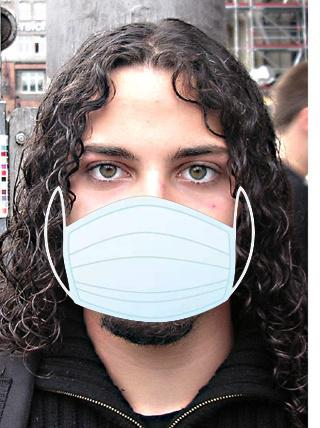

In [17]:
Image(filename='./test/with_mask/340-with-mask.jpg')

Plot the Training and Validation accuracy and loss

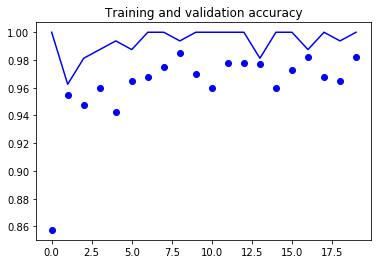

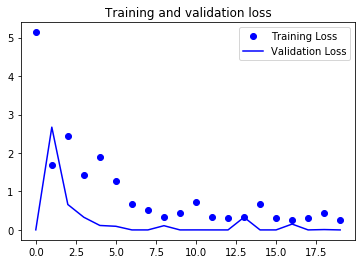

In [70]:


import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



Update the model to train the model below the layer name 'mixed7' to train on the facemask images

In [11]:
last_layer = pre_trained_model.get_layer('mixed7') #Only use layers including and above 'mixed7'
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [12]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model_tl = Model( pre_trained_model.input, x) 

#model.compile(optimizer = RMSprop(learning_rate=0.0001), 
model_tl.compile(optimizer = 'adam',               
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

last layer output shape:  (None, 7, 7, 768)


Create the training data set from images in the folder

In [13]:

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 16,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 16,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))



Found 1318 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [16]:
callbacks = myCallback()
history = model_tl.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 20,
            epochs = 20,
            validation_steps = 10,
            verbose = 2,
            callbacks=[callbacks])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/20 - 12s - loss: 1.2935 - acc: 0.8000 - val_loss: 0.0825 - val_acc: 0.9812
Epoch 2/20
20/20 - 8s - loss: 0.0961 - acc: 0.9688 - val_loss: 0.0364 - val_acc: 0.9937
Epoch 3/20
20/20 - 9s - loss: 0.0674 - acc: 0.9812 - val_loss: 0.0299 - val_acc: 0.9875
Epoch 4/20
20/20 - 9s - loss: 0.1411 - acc: 0.9625 - val_loss: 0.0261 - val_acc: 0.9875
Epoch 5/20
20/20 - 8s - loss: 0.0496 - acc: 0.9844 - val_loss: 0.0566 - val_acc: 0.9875
Epoch 6/20
20/20 - 8s - loss: 0.0792 - acc: 0.9719 - val_loss: 0.0352 - val_acc: 0.9937
Epoch 7/20
20/20 - 8s - loss: 0.0758 - acc: 0.9750 - val_loss: 0.0342 - val_acc: 0.9937
Epoch 8/20
20/20 - 8s - loss: 0.0424 - acc: 0.9750 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 9/20
20/20 - 9s - loss: 0.1072 - acc: 0.9688 - val_loss: 0.0112 - val_acc: 0.9937
Epoch 10/20
20/20 - 8s - loss: 0.0900 - acc: 0.9645 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 11/20
20/20 - 9s - loss: 0.0465 - acc: 0.9875 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 12/20
20/20 - 9s - loss

In [39]:
path='./test/without_mask/'
i=0
for x in os.listdir(path):
    if x.endswith(".jpg"):
        # Prints only text file present in My Folder
        img_name=path+x
        print(img_name)
        test_image=image.load_img(img_name, target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image = test_image/255
        test_image=np.expand_dims(test_image,axis=0)
        pred=model_tl.predict(test_image)
        print("prediction ",pred)
        #y_classes = pred.argmax(axis=-1)
        y_classes = np.argmax(pred)
        print("y_classes",int(pred[0][0]))
        print("prediction for {} is {}".format(img_name,pred[0][0]))
        i=i+1
        if i>10:
            break

./test/without_mask/10.jpg
prediction  [[1.]]
y_classes 1
prediction for ./test/without_mask/10.jpg is 1.0
./test/without_mask/89.jpg
prediction  [[1.]]
y_classes 1
prediction for ./test/without_mask/89.jpg is 1.0
./test/without_mask/179.jpg
prediction  [[1.]]
y_classes 1
prediction for ./test/without_mask/179.jpg is 1.0
./test/without_mask/368.jpg
prediction  [[0.99999976]]
y_classes 0
prediction for ./test/without_mask/368.jpg is 0.9999997615814209
./test/without_mask/54.jpg
prediction  [[1.]]
y_classes 1
prediction for ./test/without_mask/54.jpg is 1.0
./test/without_mask/261.jpg
prediction  [[1.]]
y_classes 1
prediction for ./test/without_mask/261.jpg is 1.0
./test/without_mask/324.jpg
prediction  [[1.]]
y_classes 1
prediction for ./test/without_mask/324.jpg is 1.0
./test/without_mask/117.jpg
prediction  [[1.]]
y_classes 1
prediction for ./test/without_mask/117.jpg is 1.0
./test/without_mask/432.jpg
prediction  [[1.]]
y_classes 1
prediction for ./test/without_mask/432.jpg is 1.0
./

In [40]:
path='./test/with_mask/'
i=0
for x in os.listdir(path):
    if x.endswith(".jpg"):
        # Prints only text file present in My Folder
        img_name=path+x
        print(img_name)
        test_image=image.load_img(img_name, target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image = test_image/255
        test_image=np.expand_dims(test_image,axis=0)
        pred=model_tl.predict(test_image)
        print("prediction ",pred)
        y_classes = np.argmax(pred[0])
        print("y_classes ",int(pred[0][0]))
        print("prediction for {} is {}".format(img_name,pred[0][0]))
        i=i+1
        if i>10:
            break

./test/with_mask/357-with-mask.jpg
prediction  [[4.4240664e-10]]
y_classes  0
prediction for ./test/with_mask/357-with-mask.jpg is 4.424066391006676e-10
./test/with_mask/456-with-mask.jpg
prediction  [[3.8615297e-10]]
y_classes  0
prediction for ./test/with_mask/456-with-mask.jpg is 3.8615297071054044e-10
./test/with_mask/78-with-mask.jpg
prediction  [[1.1098332e-06]]
y_classes  0
prediction for ./test/with_mask/78-with-mask.jpg is 1.1098331924586091e-06
./test/with_mask/285-with-mask.jpg
prediction  [[2.415804e-08]]
y_classes  0
prediction for ./test/with_mask/285-with-mask.jpg is 2.4158039124699826e-08
./test/with_mask/186-with-mask.jpg
prediction  [[1.0716997e-12]]
y_classes  0
prediction for ./test/with_mask/186-with-mask.jpg is 1.0716996951334878e-12
./test/with_mask/429-with-mask.jpg
prediction  [[3.6595303e-11]]
y_classes  0
prediction for ./test/with_mask/429-with-mask.jpg is 3.6595303176678584e-11
./test/with_mask/34-with-mask.jpg
prediction  [[1.825052e-11]]
y_classes  0
pred

In [172]:
#model.summary()

Plot the training and validation accuracy and loss

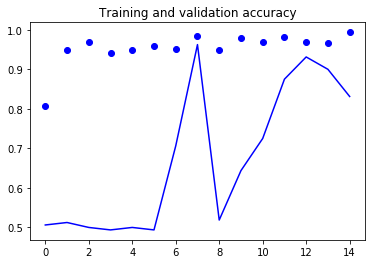

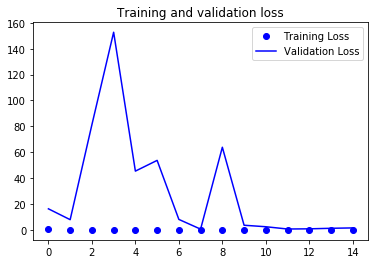

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

